In [89]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

In [90]:
# Read monthly trade data
df_trade = pd.read_csv('../data/processed/monthly_TradeData.csv')

df_trade

Period ReporterISO PartnerISO  PrimaryValue
0       2015-01-01         DZA        USA  2.628566e+03
1       2015-01-01         AGO        FRA  4.950500e+02
2       2015-01-01         AGO        NAM  2.426630e+03
3       2015-01-01         AGO        USA  6.091000e+01
4       2015-01-01         AZE        NLD  3.215760e+03
...            ...         ...        ...           ...
460991  2018-12-01         TWN        EGY  8.331526e+04
460992  2018-12-01         TWN        GBR  8.721823e+06
460993  2018-12-01         TWN        TZA  2.768410e+05
460994  2018-12-01         TWN        USA  3.439689e+08
460995  2018-12-01         TWN        BFA  6.103740e+02

[460996 rows x 4 columns]

In [91]:
# Group by reporting country and sum the trade values
trade_by_reporting_country = df_trade.groupby('ReporterISO')['PrimaryValue'].sum()

trade_by_reporting_country

ReporterISO
AGO    2.382276e+06
ALB    8.112405e+04
AND    3.978929e+07
ARE    8.434236e+08
ARG    9.478488e+06
           ...     
WSM    4.518200e+01
YEM    5.530604e+03
ZAF    2.411924e+08
ZMB    2.613275e+05
ZWE    3.844527e+04
Name: PrimaryValue, Length: 145, dtype: float64

In [92]:
# Group by partner country and sum the trade values
trade_by_partner_country = df_trade.groupby('PartnerISO')['PrimaryValue'].sum()

trade_by_partner_country

PartnerISO
AFG    4.012432e+07
AGO    3.354418e+07
ALB    2.919203e+07
AND    1.439052e+08
ARE    2.956472e+09
           ...     
WSM    1.268012e+06
YEM    3.217160e+06
ZAF    1.790314e+09
ZMB    1.170873e+07
ZWE    1.184751e+07
Name: PrimaryValue, Length: 192, dtype: float64

In [93]:
# Sort and get top 10 reporting countries by trade value
top_reporting_countries = trade_by_reporting_country.sort_values(ascending=False).head(10)

top_reporting_countries

ReporterISO
TWN    1.943498e+12
SGP    8.432283e+11
KOR    5.830200e+11
CHN    5.212084e+11
USA    4.998982e+11
MYS    3.817034e+11
JPN    3.451441e+11
DEU    1.882087e+11
PHL    1.753438e+11
NLD    9.106825e+10
Name: PrimaryValue, dtype: float64

In [94]:
# Sort and get top 10 partner countries by trade value
top_partner_countries = trade_by_partner_country.sort_values(ascending=False).head(10)

top_partner_countries

PartnerISO
CHN    1.978833e+12
SGP    6.321965e+11
TWN    4.943473e+11
KOR    4.173157e+11
MYS    3.995356e+11
USA    2.971338e+11
JPN    2.775750e+11
VNM    2.696706e+11
DEU    1.843798e+11
MEX    1.543108e+11
Name: PrimaryValue, dtype: float64

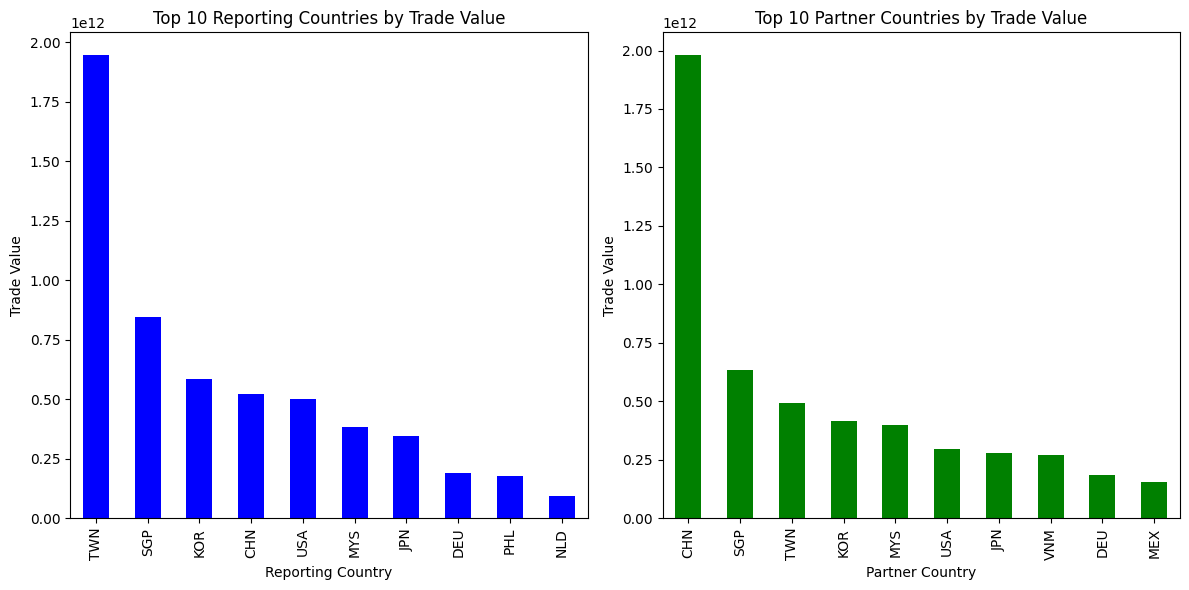

In [95]:
import matplotlib.pyplot as plt

# Assuming top_reporting_countries and top_partner_countries are pandas Series

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot top reporting countries
top_reporting_countries.plot(kind='bar', ax=axes[0], color='blue')
axes[0].set_title('Top 10 Reporting Countries by Trade Value')
axes[0].set_xlabel('Reporting Country')
axes[0].set_ylabel('Trade Value')

# Plot top partner countries
top_partner_countries.plot(kind='bar', ax=axes[1], color='green')
axes[1].set_title('Top 10 Partner Countries by Trade Value')
axes[1].set_xlabel('Partner Country')
axes[1].set_ylabel('Trade Value')

plt.tight_layout()
plt.show()


In [96]:
# Convert 'Period' to datetime format
df_trade['Period'] = pd.to_datetime(df_trade['Period'])

# Set date as index
df_trade.set_index('Period', inplace=True)

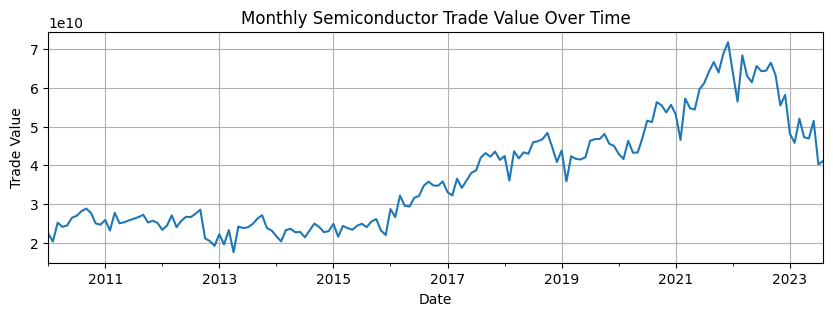

In [97]:
# Resample and aggregate trade values by month
monthly_trade = df_trade.resample('M')['PrimaryValue'].sum()

# Plot trend over time
plt.figure(figsize=(10, 3))  # Optional: Set figure size for better readability
monthly_trade.plot(title='Monthly Semiconductor Trade Value Over Time')
plt.xlabel('Date')
plt.ylabel('Trade Value')
plt.grid(True)  # Optional: Add grid for better readability
plt.show()

monthly_trade = monthly_trade.to_frame()
monthly_trade.to_csv('../data/processed/monthly_WorldTrade.csv')

In [98]:
monthly_trade

PrimaryValue
Period                  
2010-01-31  2.240636e+10
2010-02-28  2.033400e+10
2010-03-31  2.518405e+10
2010-04-30  2.410615e+10
2010-05-31  2.447201e+10
...                  ...
2023-04-30  4.725996e+10
2023-05-31  4.695919e+10
2023-06-30  5.150474e+10
2023-07-31  4.024599e+10
2023-08-31  4.112966e+10

[164 rows x 1 columns]

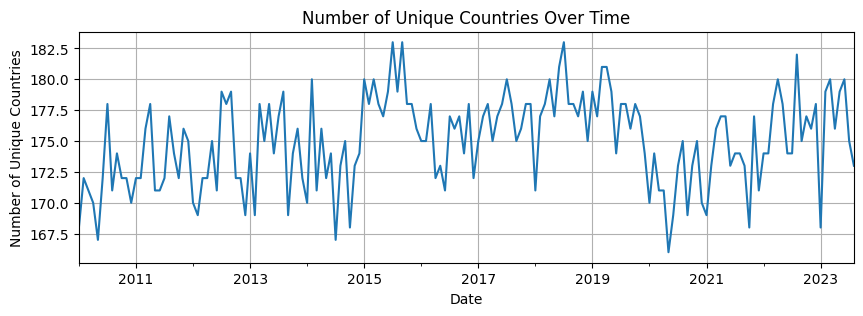

In [99]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the integer column to datetime format
#df['Period'] = pd.to_datetime(df['Period'], format='%Y%m')

# Define a function to calculate the number of unique countries
def unique_countries_per_period(df):
    # Combine PartnerISO and ReporterISO into one series and get unique values
    combined = df[['PartnerISO', 'ReporterISO']].stack().unique()
    return len(combined)

# Group by period and apply the function
unique_countries = df_trade.groupby(df_trade.index.to_period('M')).apply(unique_countries_per_period)

# Plot the trend over time
plt.figure(figsize=(10, 3))  # Optional: Set figure size for better readability
unique_countries.plot(title='Number of Unique Countries Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Unique Countries')
plt.grid(True)  # Optional: Add grid for better readability
plt.show()


In [100]:
unique_countries

Period
2010-01    168
2010-02    172
2010-03    171
2010-04    170
2010-05    167
          ... 
2023-04    176
2023-05    179
2023-06    180
2023-07    175
2023-08    173
Freq: M, Length: 164, dtype: int64

In [101]:
# De-index the 'Period' column and reset index
df_trade = df_trade.reset_index()
df_trade

Period ReporterISO PartnerISO  PrimaryValue
0      2015-01-01         DZA        USA  2.628566e+03
1      2015-01-01         AGO        FRA  4.950500e+02
2      2015-01-01         AGO        NAM  2.426630e+03
3      2015-01-01         AGO        USA  6.091000e+01
4      2015-01-01         AZE        NLD  3.215760e+03
...           ...         ...        ...           ...
460991 2018-12-01         TWN        EGY  8.331526e+04
460992 2018-12-01         TWN        GBR  8.721823e+06
460993 2018-12-01         TWN        TZA  2.768410e+05
460994 2018-12-01         TWN        USA  3.439689e+08
460995 2018-12-01         TWN        BFA  6.103740e+02

[460996 rows x 4 columns]

### Network
Construct network of each period
Remove unimportant nodes
Calculate the structure properties of Network for each period 

Compare which way would be better to remove unimportant nodes -- with closeness centrality the nodes are better divided

/Users/ouharuhua/anaconda3/envs/Code_for_thesis/lib/python3.8/site-packages/networkx/drawing/nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(
/var/folders/pj/59k0gxhn4sn0yrsml90mvxnr0000gn/T/ipykernel_66553/2379230781.py:45: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Centrality')


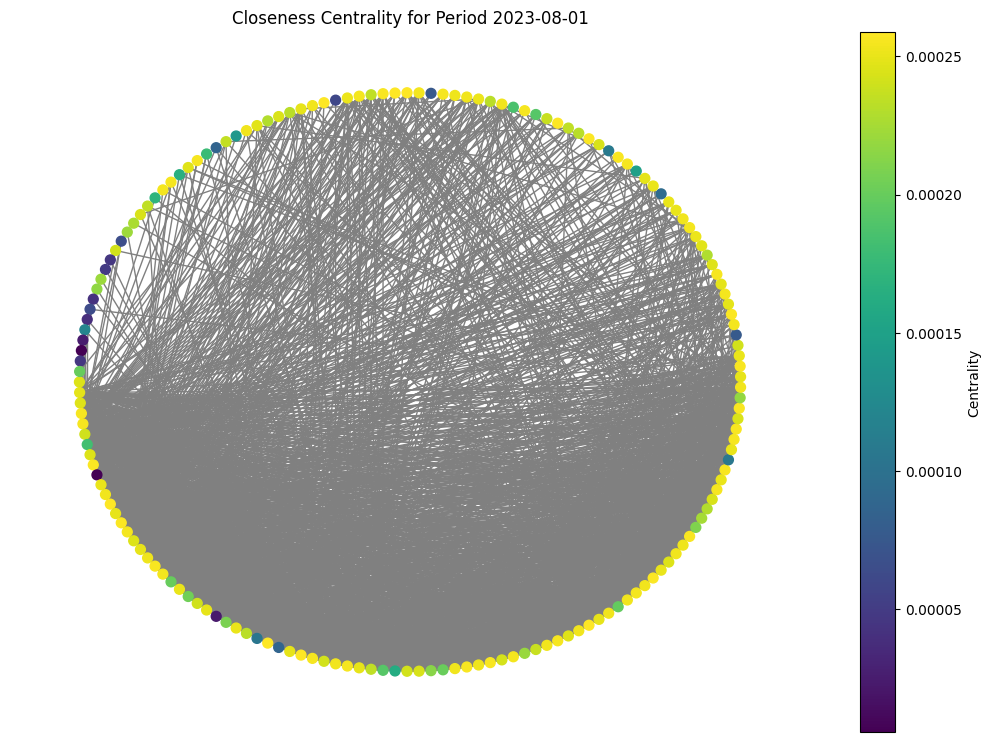

In [141]:

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.cm as cm

# Function to create and compute centrality for a specific period
def create_and_compute_centrality_for_period(df, period):
    # Filter data for the specific period
    period_data = df[df['Period'] == period]

    # Create a graph
    G = nx.Graph()

    # Add nodes and edges with trade values
    for _, row in period_data.iterrows():
        G.add_edge(row['ReporterISO'], row['PartnerISO'], weight=row['PrimaryValue'])

    # Calculate centrality measures
    closeness_centrality = nx.closeness_centrality(G, distance='weight')

    return G, closeness_centrality

# Function to plot the network with centrality measures
def plot_network_with_centrality(G, centrality, title, pos=None):
    plt.figure(figsize=(10, 7))
    
    if pos is None:
        pos = {}
        circPos1 = nx.shell_layout(G)
        for node, coords in circPos1.items():
            pos[node] = (coords[0] + 0.01, coords[1] - 0.05)
      # Positioning nodes 

    # Normalize centrality values for coloring
    centrality_values = np.array(list(centrality.values()))
    norm = plt.Normalize(centrality_values.min(), centrality_values.max())
    node_colors = [cm.viridis(norm(centrality[node])) for node in G.nodes()]

    # Draw the network
    nx.draw_networkx_labels(G, pos=circPos1, ax=axes[0])
    nx.draw(G, pos, node_size=50, edge_color='gray', with_labels=False, node_color=node_colors, cmap=cm.viridis)
    sm = plt.cm.ScalarMappable(cmap=cm.viridis, norm=norm)
    sm.set_array([])
    plt.colorbar(sm, label='Centrality')
    plt.title(title)
    plt.show()

# Apply to chosen periods
chosen_period = ['2023-08-01']

for period in chosen_period:
    # Create and compute centrality for the period
    G, closeness_centrality = create_and_compute_centrality_for_period(df_trade, period)

    # Plot the network with closeness centrality
    plot_network_with_centrality(G, closeness_centrality, f'Closeness Centrality for Period {period}')


In [134]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Function to create and filter network for a specific period
def create_and_filter_network_for_period(df, period):
    # Filter data for the specific period
    period_data = df[df['Period'] == period]

    # Create a graph
    G = nx.Graph()

    # Add nodes and edges with trade values
    for _, row in period_data.iterrows():
        G.add_edge(row['ReporterISO'], row['PartnerISO'], weight=row['PrimaryValue'])

    # Compute closeness centrality
    closeness_centrality = nx.closeness_centrality(G)

    # Convert closeness centrality to a list
    closeness_values = list(closeness_centrality.values())

    # Calculate the 25th percentile of closeness centrality
    percentile_25th = np.percentile(closeness_values, 25)

    # Nodes to be removed based on the percentile threshold
    nodes_to_remove = [node for node, centrality in closeness_centrality.items() if centrality < percentile_25th]

    # Filter the original period data to exclude rows with removed nodes
    filtered_period_data = period_data[
        (~period_data['ReporterISO'].isin(nodes_to_remove)) & 
        (~period_data['PartnerISO'].isin(nodes_to_remove))
    ]

    return G, filtered_period_data, nodes_to_remove, percentile_25th

# Initialize lists and dictionaries
filtered_data_list = []
nodes_to_remove_dict = {}
network_sets = {}

# Apply to each period
unique_periods = df_trade['Period'].unique()

for period in unique_periods:
    G, filtered_period_data, nodes_to_remove, percentile_25th = create_and_filter_network_for_period(df_trade, period)
    
    # Append filtered data for each period to the list
    filtered_data_list.append(filtered_period_data)
    
    # Store nodes to remove for the current period
    nodes_to_remove_dict[period] = nodes_to_remove
    
    # Store the network for the current period
    network_sets[f'network_{period}'] = G
    

# Combine filtered data for all periods
monthly_trade_filtered = pd.concat(filtered_data_list)
monthly_trade_filtered.to_csv('../data/processed/df_trade_filtered.csv')


In [161]:
# Create a DataFrame for nodes to remove
nodes_to_remove_df = pd.DataFrame([(period, node) for period, nodes in nodes_to_remove_dict.items() for node in nodes], columns=['Period', 'RemovedNode'])

# Group by the 'RemovedNode' column and count occurrences
node_counts = nodes_to_remove_df.groupby('RemovedNode').size().reset_index(name='Count')

node_counts.to_csv('../data/processed/removed_node_counts.csv')

['AND', 'SLB', 'GIN', 'MRT', 'VUT', 'BFA', 'GAB', 'BLZ', 'ATG', 'MMR', 'CPV', 'ERI', 'MNG', 'SWZ', 'YEM', 'BEN', 'SOM', 'NIC', 'BRB', 'BDI', 'LBR', 'MDG', 'MLI', 'SYC', 'MHL', 'RWA', 'SSD', 'GMB', 'LAO', 'SUR', 'SYR', 'BTN', 'COM', 'LSO', 'MWI', 'GNQ', 'TKM', 'DJI', 'GUY', 'BHS', 'KNA', 'LCA', 'TJK']


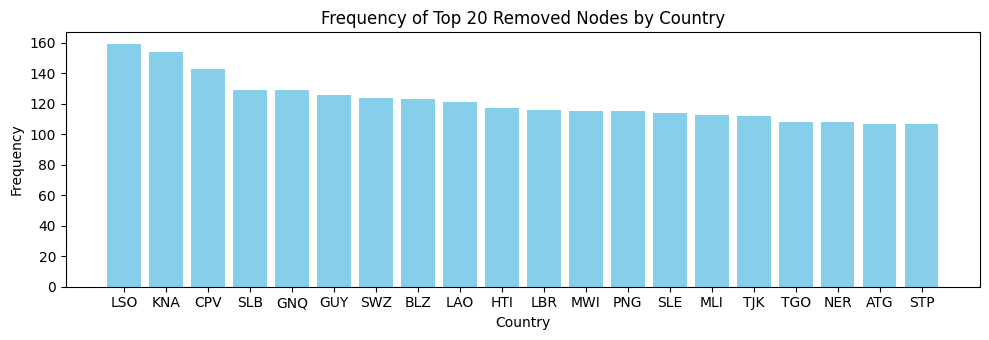

In [173]:
# Sort by the count in descending order
top_node_counts = node_counts.sort_values(by='Count', ascending=False).head(20)

# Plot the node counts using a bar chart
plt.figure(figsize=(10, 3.5))
plt.bar(top_node_counts['RemovedNode'], top_node_counts['Count'], color='skyblue')

# Set labels and title
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.title('Frequency of Top 20 Removed Nodes by Country')
# plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability

# Show plot
plt.tight_layout()
plt.show()

In [109]:
network_sets

{'network_2015-01-01 00:00:00': <networkx.classes.graph.Graph at 0x1689e2f70>,
 'network_2015-02-01 00:00:00': <networkx.classes.graph.Graph at 0x14fa6e0d0>,
 'network_2015-03-01 00:00:00': <networkx.classes.graph.Graph at 0x12fb370a0>,
 'network_2015-04-01 00:00:00': <networkx.classes.graph.Graph at 0x12f928f70>,
 'network_2015-05-01 00:00:00': <networkx.classes.graph.Graph at 0x177382a60>,
 'network_2015-06-01 00:00:00': <networkx.classes.graph.Graph at 0x13ae6d280>,
 'network_2015-07-01 00:00:00': <networkx.classes.graph.Graph at 0x1774f4fa0>,
 'network_2015-08-01 00:00:00': <networkx.classes.graph.Graph at 0x176ae3f70>,
 'network_2015-09-01 00:00:00': <networkx.classes.graph.Graph at 0x13a9ad490>,
 'network_2015-10-01 00:00:00': <networkx.classes.graph.Graph at 0x1689e2fa0>,
 'network_2015-11-01 00:00:00': <networkx.classes.graph.Graph at 0x1774de6d0>,
 'network_2015-12-01 00:00:00': <networkx.classes.graph.Graph at 0x169fa7970>,
 'network_2014-01-01 00:00:00': <networkx.classes.gr

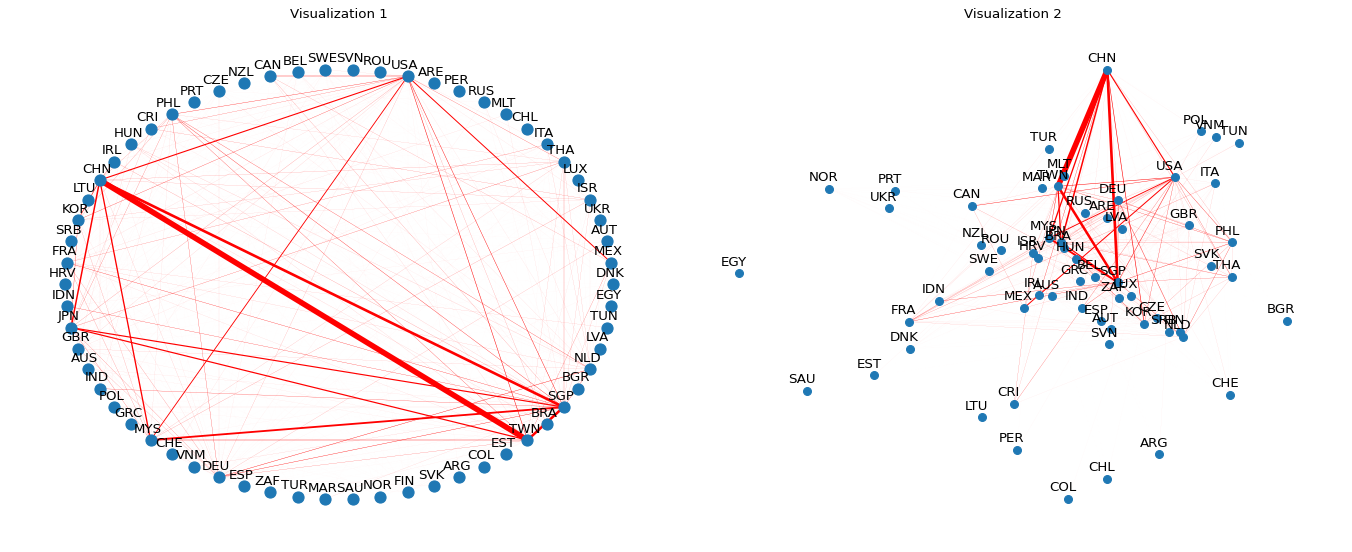

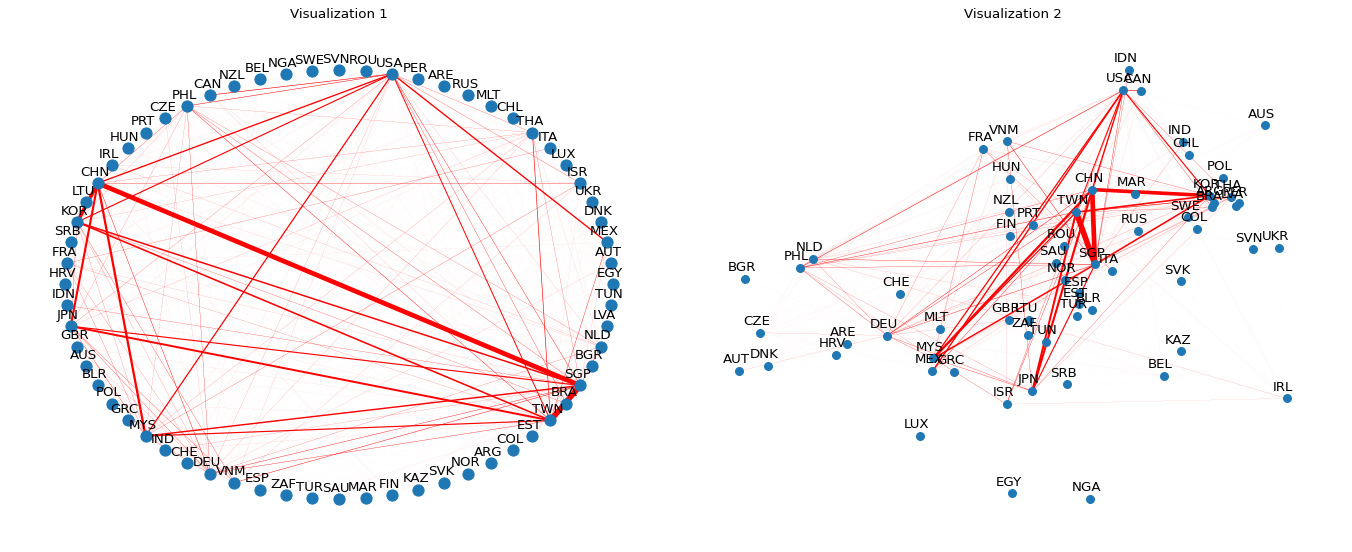

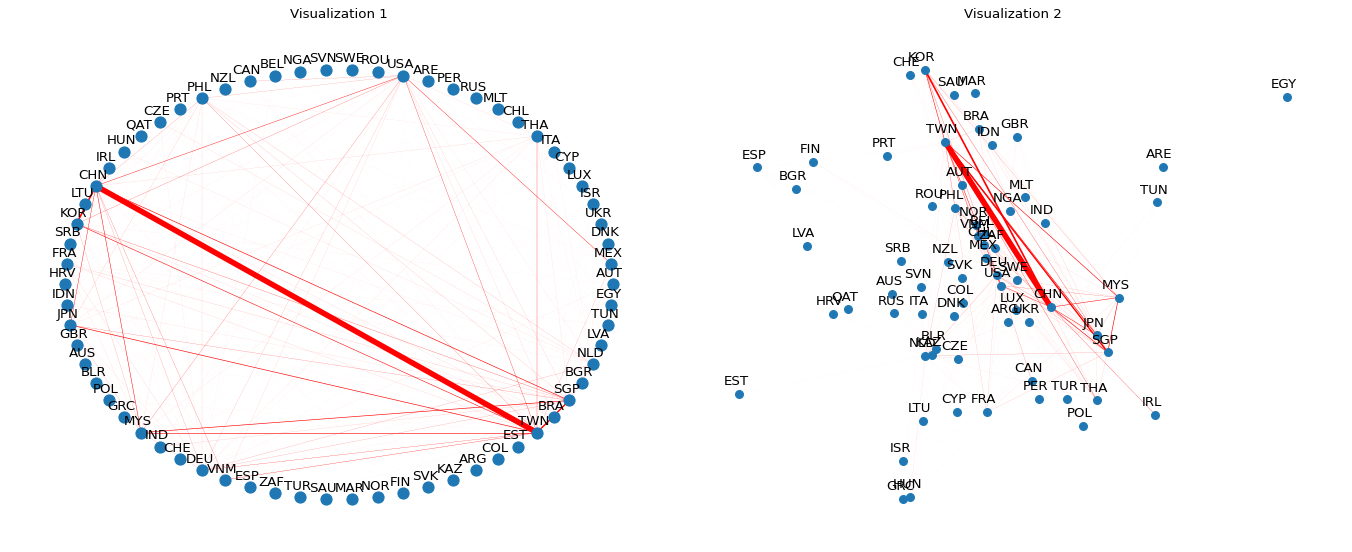

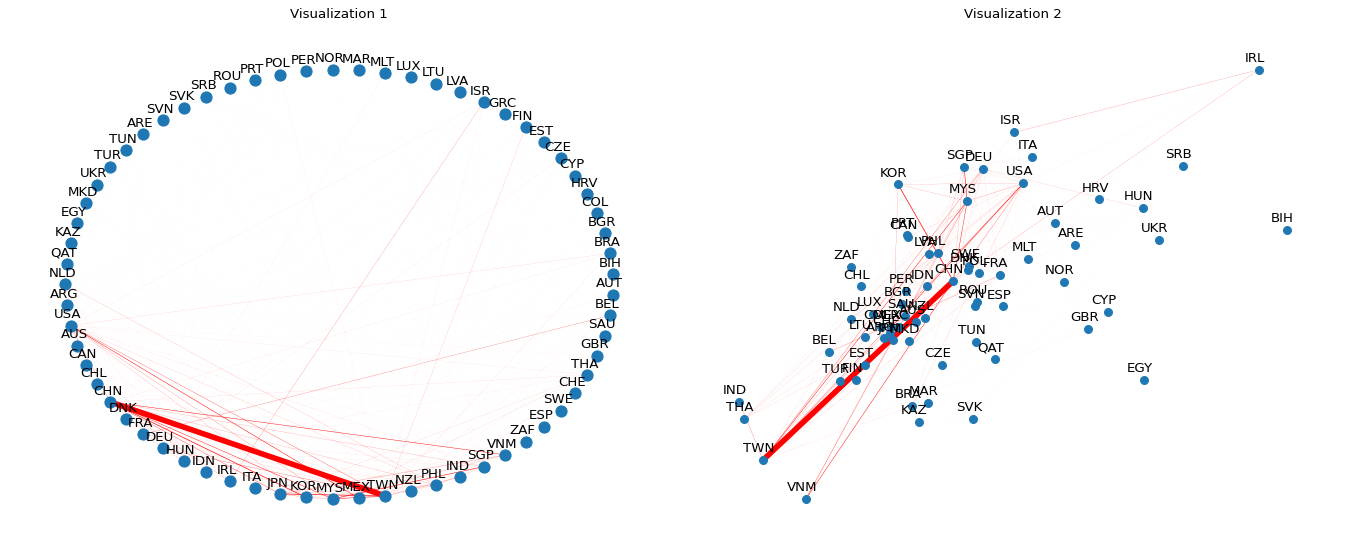

In [196]:
import matplotlib.cm as cm
from sklearn.preprocessing import MinMaxScaler

# Function to plot the network
def plot_network(G, title, pos=None, nodes_to_highlight=None):    
    # Compute closeness centrality
    closeness_centrality = nx.closeness_centrality(G)

    # Convert closeness centrality to a list
    closeness_values = list(closeness_centrality.values())

    # Calculate the 25th percentile of closeness centrality
    percentile_50th = np.percentile(closeness_values, 50)

    # Nodes to be kept based on the percentile threshold
    nodes_to_keep = [node for node, centrality in closeness_centrality.items() if centrality > percentile_50th]
    
    # Create a subgraph with only important nodes and their edges
    G = G.subgraph(nodes_to_keep)

    nodes_to_highlight=nodes_to_remove
    
    # Determine node colors
    node_colors = ['yellow' if node in nodes_to_highlight else 'deepskyblue' for node in G.nodes()]
    
    # Edge weights and colors
    # Extract edge weights for scaling link widths
    edge_weights = [data['weight'] for _, _, data in G.edges(data=True)]
    max_edge_weight = max(edge_weights)

    # Calculate normalized link widths based on weights
    edge_widths = [width / max_edge_weight * 5 for width in edge_weights]

    # Set up colors for edges
    colors = [G[u][v].get('color', 'red') for u, v in G.edges()]

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(17, 7), dpi=80)

    # Visualization 1
    pos_attrs1 = {}
    circPos1 = nx.shell_layout(G)
    for node, coords in circPos1.items():
        pos_attrs1[node] = (coords[0] + 0.01, coords[1] - 0.05)
    nx.draw_networkx_labels(G, pos=circPos1, ax=axes[0])
    nx.draw(G, pos=pos_attrs1, node_size=100, ax=axes[0], edge_color=colors, width=edge_widths)
    axes[0].set_title('Visualization 1')

    # Visualization 2
    pos_attrs2 = {}
    circPos2 = nx.spring_layout(G, k=0.2, iterations=20)
    for node, coords in circPos2.items():
        pos_attrs2[node] = (coords[0] + 0.01, coords[1] - 0.05)
    nx.draw_networkx_labels(G, pos=circPos2, ax=axes[1])
    nx.draw(G, pos=pos_attrs2, node_size=50, ax=axes[1], edge_color=colors, width=edge_widths)
    axes[1].set_title('Visualization 2')

    plt.tight_layout()
    plt.show()


# Apply to chosen periods
chosen_periods = ['2010-01-01', '2014-08-01', '2019-01-01', '2023-08-01']

for period in chosen_periods:
    # Filter data for the specific period
    original_data = df_trade[df_trade['Period'] == period]
    
    # Create and filter network for the period
    G, filtered_data, nodes_to_remove, percentile_25th = create_and_filter_network_for_period(df_trade, period)

    # Create graphs for plotting
    G_original = nx.Graph()
    for _, row in original_data.iterrows():
        G_original.add_edge(row['ReporterISO'], row['PartnerISO'], weight=row['PrimaryValue'])

    G_filtered = nx.Graph()
    for _, row in filtered_data.iterrows():
        G_filtered.add_edge(row['ReporterISO'], row['PartnerISO'], weight=row['PrimaryValue'])

    # Plot the network before removal
    #plot_network(G_original, f'Network for Period {period} - Before Removal', nodes_to_highlight=nodes_to_remove)

    # Plot the network after removal
    plot_network(G_filtered, f'Network for Period {period} - After Removal', nodes_to_highlight=None)

In [ ]:
# Functions
def plot_network(G):

    # Extract edge weights for scaling link widths
    edge_weights = [data['PrimaryValue'] for _, _, data in G.edges(data=True)]
    max_edge_weight = max(edge_weights)

    # Calculate normalized link widths based on weights
    edge_widths = [width / max_edge_weight * 5 for width in edge_weights]

    # Set up colors for edges
    colors = [G[u][v].get('color', 'red') for u, v in G.edges()]

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8), dpi=80)

    # Visualization 1
    pos_attrs1 = {}
    circPos1 = nx.shell_layout(G)
    for node, coords in circPos1.items():
        pos_attrs1[node] = (coords[0] + 0.01, coords[1] - 0.05)
    nx.draw_networkx_labels(G, pos=circPos1, ax=axes[0])
    nx.draw(G, pos=pos_attrs1, node_size=100, ax=axes[0], edge_color=colors, width=edge_widths)
    axes[0].set_title('Visualization 1')

    # Visualization 2
    pos_attrs2 = {}
    circPos2 = nx.spring_layout(G, k=0.2, iterations=20)
    for node, coords in circPos2.items():
        pos_attrs2[node] = (coords[0] + 0.01, coords[1] - 0.05)
    nx.draw_networkx_labels(G, pos=circPos2, ax=axes[1])
    nx.draw(G, pos=pos_attrs2, node_size=50, ax=axes[1], edge_color=colors, width=edge_widths)
    axes[1].set_title('Visualization 2')

    plt.tight_layout()
    plt.show()

# Big increase in 2010M1
# plot_network(G_200001)
plot_network(network_sets['period_200001'])
plot_network(network_sets['period_200801'])
plot_network(network_sets['period_201401'])
plot_network(network_sets['period_201701'])
plot_network(network_sets['period_202301'])


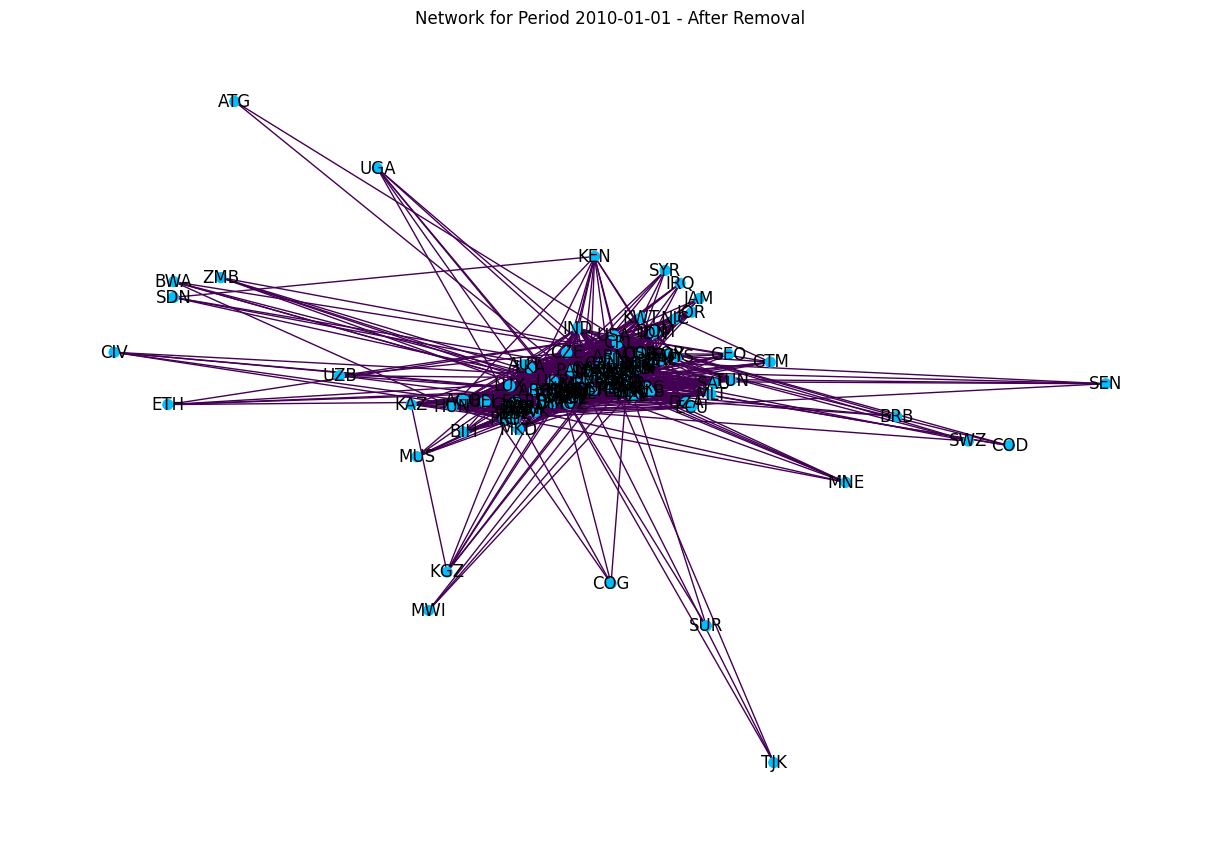

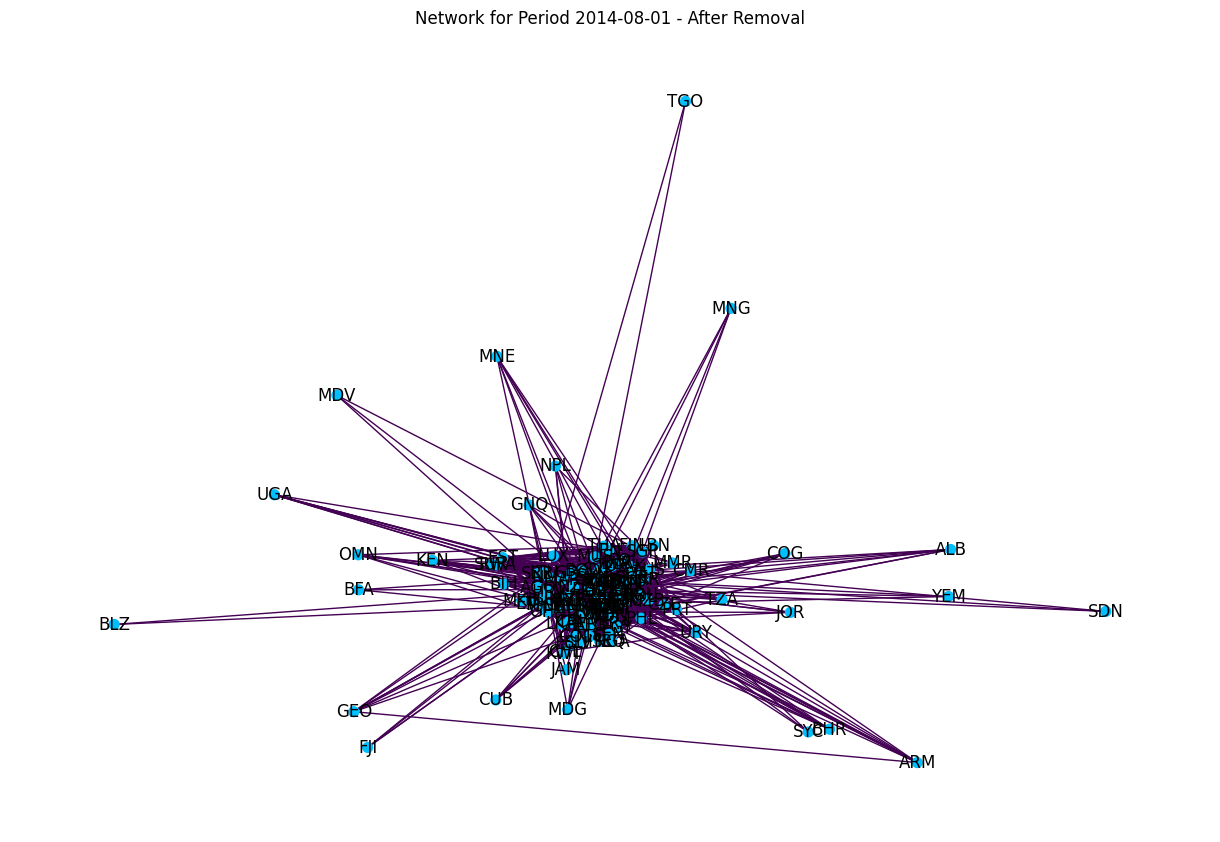

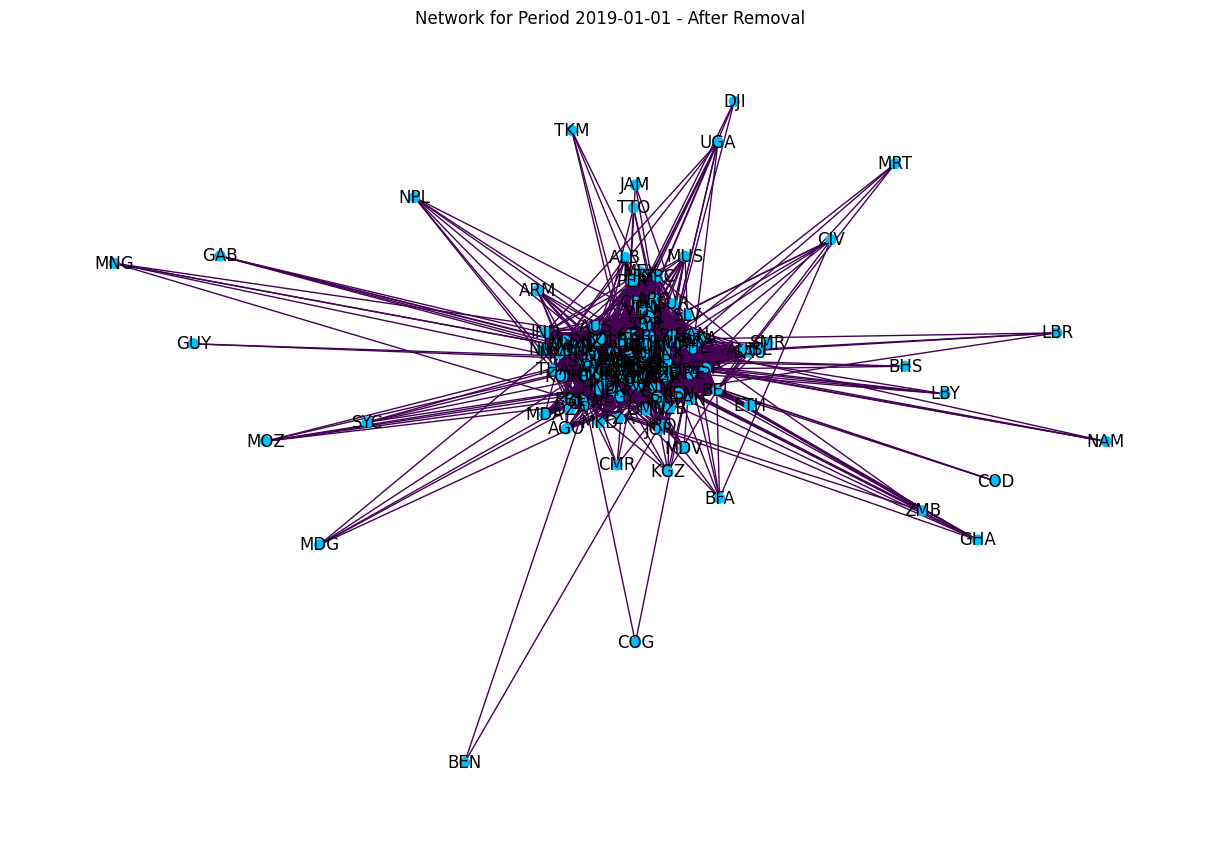

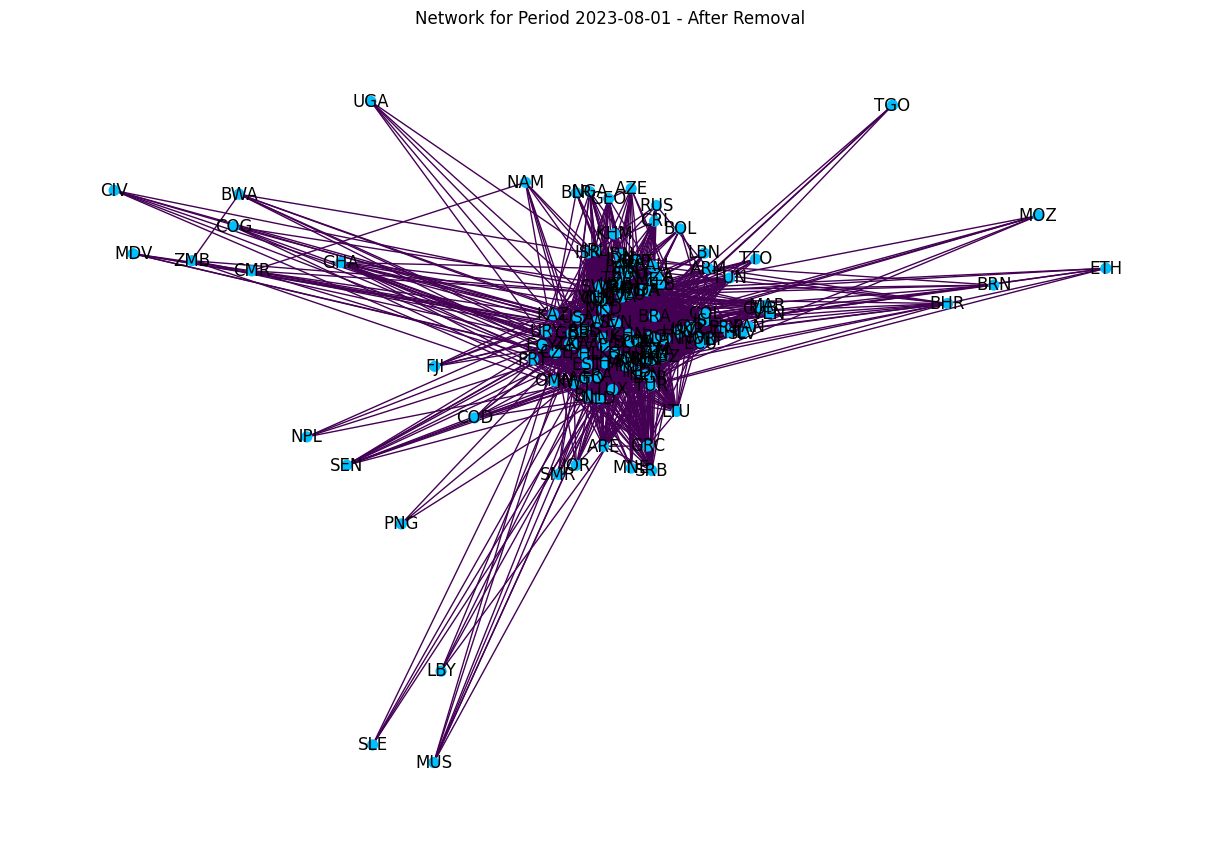

In [182]:
import matplotlib.cm as cm
from sklearn.preprocessing import MinMaxScaler

# Function to plot the network
def plot_network(G, title, pos=None, nodes_to_highlight=None):
    plt.figure(figsize=(12, 8))
    if pos is None:
        pos = nx.spring_layout(G, seed=42)  # Positioning nodes using a spring layout
    
    nodes_to_highlight=nodes_to_remove
    
    # Determine node colors
    node_colors = ['yellow' if node in nodes_to_highlight else 'deepskyblue' for node in G.nodes()]
    
    # Edge weights and colors
    scaler = MinMaxScaler()
    edge_weights = np.array([data['weight'] for _, _, data in G.edges(data=True)])
    scaled_weights = scaler.fit_transform(edge_weights.reshape(-1, 1)).flatten()
    edge_colors = [cm.viridis(weight) for weight in scaled_weights]
    
    edge_weights = [data['weight'] for _, _, data in G.edges(data=True)]
    max_edge_weight = max(edge_weights) if edge_weights else 1  # Avoid division by zero
    edge_colors = [cm.viridis(weight / max_edge_weight) for weight in edge_weights]

    # Draw the network
    nx.draw(G, pos, node_size=50, edge_color=edge_colors, with_labels=True, node_color=node_colors)
    plt.title(title)
    plt.show()

# Apply to chosen periods
chosen_periods = ['2010-01-01', '2014-08-01', '2019-01-01', '2023-08-01']

for period in chosen_periods:
    # Filter data for the specific period
    original_data = df_trade[df_trade['Period'] == period]
    
    # Create and filter network for the period
    G, filtered_data, nodes_to_remove, percentile_25th = create_and_filter_network_for_period(df_trade, period)

    # Create graphs for plotting
    G_original = nx.Graph()
    for _, row in original_data.iterrows():
        G_original.add_edge(row['ReporterISO'], row['PartnerISO'], weight=row['PrimaryValue'])

    G_filtered = nx.Graph()
    for _, row in filtered_data.iterrows():
        G_filtered.add_edge(row['ReporterISO'], row['PartnerISO'], weight=row['PrimaryValue'])

    # Plot the network before removal
    #plot_network(G_original, f'Network for Period {period} - Before Removal', nodes_to_highlight=nodes_to_remove)

    # Plot the network after removal
    plot_network(G_filtered, f'Network for Period {period} - After Removal', nodes_to_highlight=None)

### Network structure properties over time

In [112]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

# Initialize lists to store the number of nodes and edges
num_nodes_list = []
num_edges_list = []

# Iterate through the network sets
for subset_name, subset_graph in network_sets.items():
    # Extract the period from the subset name
    period = subset_name.split('_')[1]
    period_dt = pd.to_datetime(period)
    
    # Append the number of nodes and edges to the lists
    num_nodes_list.append((period_dt, subset_graph.number_of_nodes()))
    num_edges_list.append((period_dt, subset_graph.number_of_edges()))

# Sort the lists based on the period
num_nodes_list.sort(key=lambda x: x[0])
num_edges_list.sort(key=lambda x: x[0])


In [113]:

# Initialize lists to store the density, avg_clustering, assortativity
density_list = []
avg_clustering_list = []
assortativity_list = []

# Iterate through the subsets
for subset_name, subset_graph in network_sets.items():
    # Extract the period from the subset name
    period = subset_name.split('_')[1]
    period_dt = pd.to_datetime(period)
    
    # Calculate the metrics and append to the lists
    density_list.append((period_dt, nx.density(subset_graph)))
    avg_clustering_list.append((period_dt, nx.average_clustering(subset_graph)))
    assortativity_list.append((period_dt, nx.degree_assortativity_coefficient(subset_graph)))

# Sort the lists based on the period
density_list.sort(key=lambda x: x[0])
avg_clustering_list.sort(key=lambda x: x[0])
assortativity_list.sort(key=lambda x: x[0])


In [114]:
# Initialize lists to store avg shortest path length
avg_shortest_path_list = []

# Iterate through the subsets
for subset_name, subset_graph in network_sets.items():
    # Extract the period from the subset name
    period = subset_name.split('_')[1]
    period_dt = pd.to_datetime(period)
    
    # Calculate the metrics and append to the lists
    # Check if the graph is connected before computing average shortest path
    if nx.is_connected(subset_graph):
        avg_shortest_path_list.append((period_dt, nx.average_shortest_path_length(subset_graph)))
    else:
        avg_shortest_path_list.append((period_dt, None))  # Mark as missing value for disconnected graphs
    
# Sort the lists based on the period
avg_shortest_path_list.sort(key=lambda x: x[0])


### Construct Structure properties matrix

In [115]:
# Create a DataFrame
properties = pd.DataFrame({
    'Period': [item[0] for item in num_nodes_list], 
    'num_nodes': [item[1] for item in num_nodes_list],
    'num_edges': [item[1] for item in num_edges_list],
    'density': [item[1] for item in density_list],
    'clustering': [item[1] for item in avg_clustering_list],
    'assortativity': [item[1] for item in assortativity_list],
    'shortest_path': [item[1] for item in avg_shortest_path_list]
})

# Set 'period' as the index
# properties.set_index('Period', inplace=True)

# Save to csv
properties.to_csv('../data/processed/properties.csv',index=False)

In [116]:
properties

Period  num_nodes  num_edges   density  clustering  assortativity  \
0   2010-01-01        168       1828  0.130311    0.712998      -0.444260   
1   2010-02-01        172       1838  0.124983    0.760005      -0.468762   
2   2010-03-01        171       1923  0.132301    0.776834      -0.466797   
3   2010-04-01        170       1850  0.128785    0.713454      -0.467922   
4   2010-05-01        167       1876  0.135344    0.773232      -0.462863   
..         ...        ...        ...       ...         ...            ...   
159 2023-04-01        176       2060  0.133766    0.755452      -0.476133   
160 2023-05-01        179       2172  0.136338    0.756473      -0.486812   
161 2023-06-01        180       2127  0.132030    0.768839      -0.487065   
162 2023-07-01        175       2021  0.132742    0.725456      -0.482282   
163 2023-08-01        173       2005  0.134763    0.757239      -0.473308   

     shortest_path  
0         2.078985  
1         2.061200  
2         2.032542  
3         2.069474  
4         2.023086  
..             ...  
159       2.014156  
160       2.003955  
161       2.027871  
162       2.023580  
163       2.016534  

[164 rows x 7 columns]

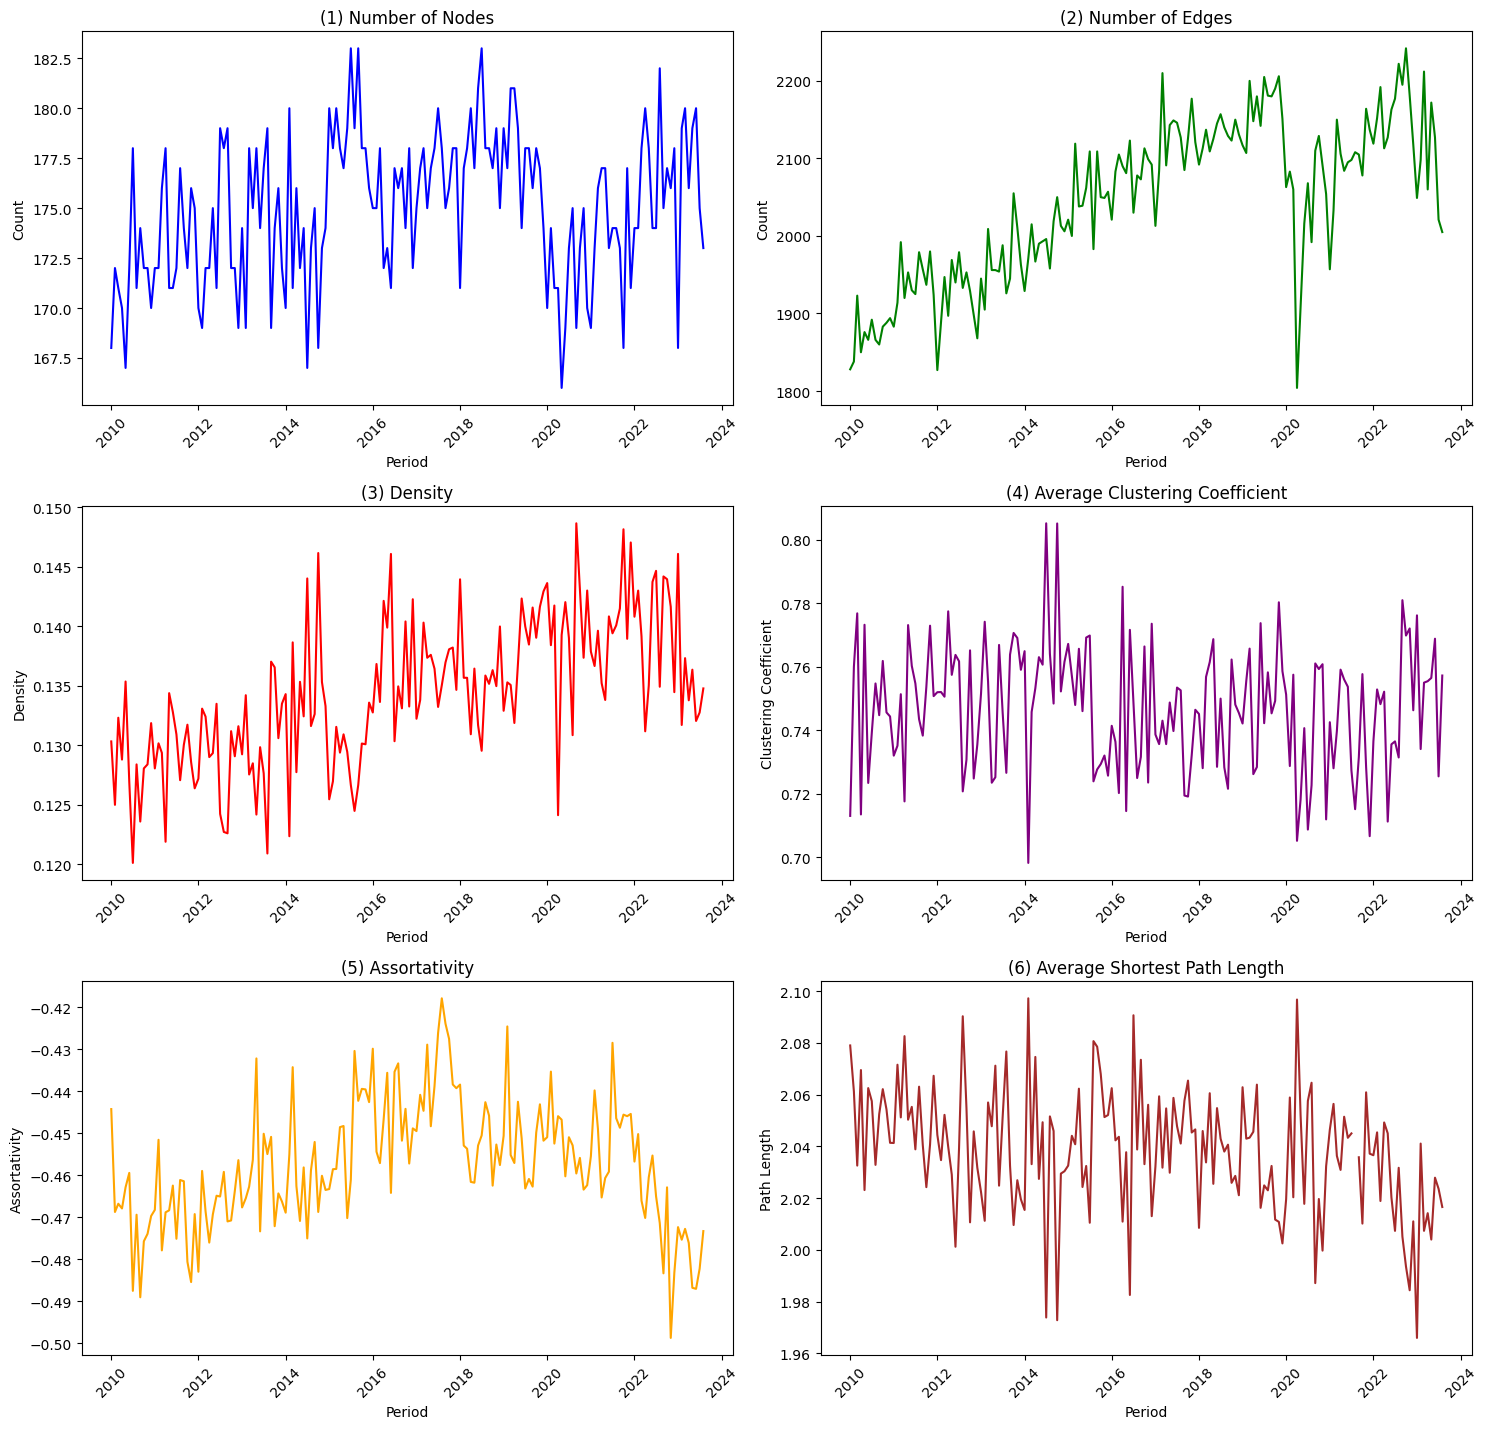

In [117]:
# Plot each column
fig, axs = plt.subplots(3, 2, figsize=(15, 15))
# fig.suptitle('Network Properties Over Time')

# Titles and labels for each subplot
titles = ['(1) Number of Nodes', '(2) Number of Edges', '(3) Density', '(4) Average Clustering Coefficient', '(5) Assortativity', '(6) Average Shortest Path Length']
ylabels = ['Count', 'Count', 'Density', 'Clustering Coefficient', 'Assortativity', 'Path Length']
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown']

# Plot properties
for i, ax in enumerate(axs.flat):
    ax.plot(properties['Period'], properties[properties.columns[i + 1]], label=titles[i], color=colors[i])
    ax.set_title(titles[i])
    ax.set_xlabel('Period')
    ax.set_ylabel(ylabels[i])
    ax.tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show the plots
plt.show()

In [197]:
# Get the descriptive table for properties
properties.describe()

Period   num_nodes    num_edges     density  \
count                            164  164.000000   164.000000  164.000000   
mean   2016-10-15 19:19:01.463414528  174.969512  2043.890244    0.134320   
min              2010-01-01 00:00:00  166.000000  1804.000000    0.120104   
25%              2013-05-24 06:00:00  172.000000  1957.000000    0.130118   
50%              2016-10-16 12:00:00  175.000000  2060.000000    0.133994   
75%              2020-03-08 18:00:00  178.000000  2123.500000    0.138706   
max              2023-08-01 00:00:00  183.000000  2242.000000    0.148633   
std                              NaN    3.664494   101.956686    0.006075   

       clustering  assortativity  shortest_path  
count  164.000000     164.000000     163.000000  
mean     0.746868      -0.457477       2.038319  
min      0.698179      -0.498748       1.965925  
25%      0.731484      -0.468008       2.023894  
50%      0.748467      -0.458713       2.040529  
75%      0.760697      -0.448502       2.054455  
max      0.805208      -0.417882       2.097207  
std      0.019565       0.014767       0.023881

In [119]:
properties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Period         164 non-null    datetime64[ns]
 1   num_nodes      164 non-null    int64         
 2   num_edges      164 non-null    int64         
 3   density        164 non-null    float64       
 4   clustering     164 non-null    float64       
 5   assortativity  164 non-null    float64       
 6   shortest_path  163 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 9.1 KB
